<a href="https://colab.research.google.com/github/ShirleyLiu11/google-cloud-iot-arduino/blob/master/CPM_PERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   tasks     pred  ai   mi  bi
0      A      NaN    3   6   9
1      B      NaN    2   5   6
2      C        B    2   3   7
3      D      A,C    1   3   3
4      E        D    0   7   8
5      F        C    1   2  10
6      G        F    3   4  12
7      H        F    1   2  15
8      I        B    5  10  30
9      J  E, G, H    1   3   4
10   EOP      I,J    0   0   0
--------------------

Critical Path: 
BI
Critical Path Length: 
31.20475959777832


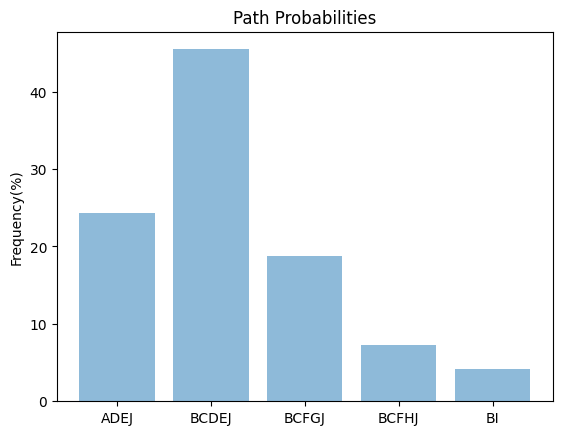

In [ ]:
import pandas as pd
import tensorflow_probability as tfp
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

PERTCPM=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PERT-CPM.csv")
print(PERTCPM)
print('--------------------\n')

taskNames=PERTCPM['tasks']
resultDataFrame=pd.DataFrame(columns=taskNames)

paths=['ADEJ', 'BCDEJ', 'BCFGJ', 'BCFHJ', 'BI']
countOfCriticalsOfEachPath = [0, 0, 0, 0, 0]

tfd = tfp.distributions

for index, task in PERTCPM.iterrows():
  dist=tfd.PERT(low=task['ai '], peak=task['mi'], high=task['bi'], temperature=4)
  resultDataFrame[task['tasks']]=dist.sample(1000)
  

overAllCriticalLength=0

#loop each path based on 1000 simples
for indexOfSimple, simple in resultDataFrame.iterrows():
  
  criticalLength=0
  criticalIndex = -1  #the index of the critical path within paths

  for indexOfPath in range(len(paths)):
    path = paths[indexOfPath]
    length = 0
    

    for indexOfTask in range(len(path)):
      task = path[indexOfTask]
      length += simple[task]
    
    if(length > criticalLength): 
      criticalLength = length
      criticalIndex = indexOfPath

    countOfCriticalsOfEachPath[criticalIndex] += 1

  if(criticalLength > overAllCriticalLength): 
    overAllCriticalLength = criticalLength
# declares the longest path as critical
print("Critical Path: ")
print(paths[criticalIndex])
print("Critical Path Length: ")
print(overAllCriticalLength)
# path critical frequency
allPathFrequency=[]
for index in countOfCriticalsOfEachPath:
  frequency=round((index/5000*100), 4)
  allPathFrequency+=[frequency]


# create chart
objects = paths
y_pos = np.arange(len(objects))
performance = allPathFrequency

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frequency(%)')
plt.title('Path Probabilities')

plt.show()








# New Section